In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


%matplotlib inline
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input,GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools

In [2]:
df = pd.read_csv('FinalData.csv', index_col=0)
df.drop_duplicates(inplace=True)

df_Categorielle = df.drop(['Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)',
                           'Erwltp (g/km)', 'Fuel consumption '], axis=1)
df_quantitative = df[['Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)',
                       'Erwltp (g/km)', 'Fuel consumption ']]
df_quantitative.fillna(df_quantitative.std(), inplace=True) 

df_Categorielle = df_Categorielle.join(pd.get_dummies(df_Categorielle[['Country','Ct','Ft','Cr']]))
df_Categorielle = df_Categorielle.drop(['Country','Ct','Ft','Cr'],axis=1)

le = LabelEncoder()
df_Categorielle['Mk'] = le.fit_transform(df_Categorielle['Mk'])
df_Categorielle['Mh'] = le.fit_transform(df_Categorielle['Mh'])
df_Categorielle['IT'] = le.fit_transform(df_Categorielle['IT'])

df_Final = df_Categorielle.join(df_quantitative)

data = df_Final.drop('Ewltp (g/km)',axis=1)
target = df_Final['Ewltp (g/km)']

def new_target(x):
    res = 0
    if(x <= 100) : res = 1
    elif((x > 100 ) & (x <= 120)):res = 2
    elif((x > 120) & (x <= 140)): res = 3
    elif((x > 140) & (x <= 160)): res = 4
    elif((x > 160) & (x <= 200)): res = 5
    elif((x > 200) & (x <= 250)): res = 6
    elif((x > 250)): res = 7
    return res

target = target.apply(new_target)
target

C:\Users\frobi\AppData\Local\Temp\ipykernel_27260\1176624221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantitative.fillna(df_quantitative.std(), inplace=True)


ID
77074142    2
77074143    2
77074144    2
77074145    2
77074153    2
           ..
82161991    7
86000001    1
86000021    2
86000022    2
86000029    3
Name: Ewltp (g/km), Length: 454894, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=123)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
num_var_exp = X_train_scaled.shape[1]

model = Sequential()

# Part 1 : Input Layer
model.add(Dense(32, activation='relu'))

# Part 2 : Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))

# Part 3 : Output Layer
model.add(Dense(num_var_exp, activation='softmax'))

# Loss function 
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['acc'])

# Learning
history = model.fit(X_train_scaled, y_train.values, validation_data=(X_test_scaled ,y_test.values), verbose=1, batch_size=64, epochs=30)


Epoch 1/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - acc: 0.8675 - loss: 0.3783 - val_acc: 0.9625 - val_loss: 0.0978
Epoch 2/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.9611 - loss: 0.0973 - val_acc: 0.9672 - val_loss: 0.0776
Epoch 3/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.9652 - loss: 0.0840 - val_acc: 0.9685 - val_loss: 0.0716
Epoch 4/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - acc: 0.9668 - loss: 0.0788 - val_acc: 0.9664 - val_loss: 0.0781
Epoch 5/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - acc: 0.9677 - loss: 0.0758 - val_acc: 0.9718 - val_loss: 0.0695
Epoch 6/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.9688 - loss: 0.0725 - val_acc: 0.9637 - val_loss: 0.0826
Epoch 7/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.9707 - loss: 0.0692 - val_acc: 0.9711 - val_loss: 0.0658
Epoch 8/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.9708 - loss: 0.0675 - val_acc: 0.9701 - val_loss: 0.0769
Epoch 9/50
5331/5331 ━━━━━━━━━━━━━━━━━━━

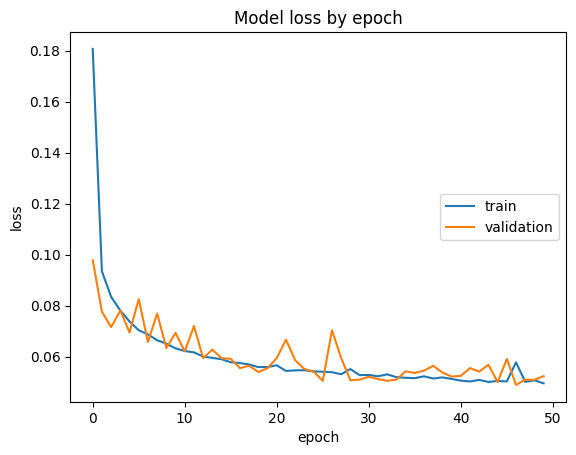

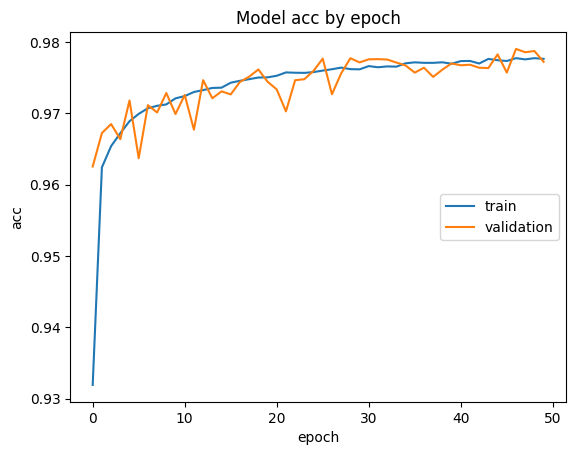

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='right')
plt.show()